In [1]:
 # Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path
from src.plot import *
from src.data import image_data_loader
import torchvision.transforms as transforms

In [46]:
# Matplotlib settings
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['savefig.dpi'] = 600
mpl.rcParams['font.size'] = 28
mpl.rcParams['axes.formatter.limits'] = (-3, 3)
mpl.rcParams['axes.formatter.use_mathtext'] = True

mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['legend.fontsize'] = 23
mpl.rcParams['legend.labelspacing'] = 0.3
mpl.rcParams['legend.borderpad'] = 0.2
mpl.rcParams['legend.handlelength'] = 1.5

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
def replace(df, column="data", find_str=["mnist"], replace_str=["MNIST"]):
    assert len(find_str) == len(replace_str)
    for i in range(len(find_str)):
        df.loc[df[column]==find_str[i], column] = replace_str[i]
    return df

# AE Plot 

## get data

In [5]:
res_cluster_syn = best_hyperparam_clust('results/ae_clust_synthetic.csv')
res_cluster_syn

data   model                  lr final_train_loss_mean  \
0   parallel_line  kmeans                   -                     -   
1        triangle  kmeans                   -                     -   
2      orthogonal  kmeans                   -                     -   
3        lines_3D  kmeans                   -                     -   
4   parallel_line     ae1             [0.001]              1.406491   
5        triangle     ae1              [0.01]              3.864638   
6      orthogonal     ae1  [0.001, 0.01, 0.1]              1.075783   
7        lines_3D     ae1             [0.001]              0.747879   
8   parallel_line     ae2             [0.001]              1.407701   
9        triangle     ae2              [0.01]              3.866984   
10     orthogonal     ae2  [0.001, 0.01, 0.1]              1.078866   
11       lines_3D     ae2             [0.001]              0.748457   
12  parallel_line     ae3             [0.001]              0.848455   
13       triangle     ae3       [0.001, 0.01]              0.007894   
14     orthogonal     ae3  [0.001, 0.01, 0.1]              0.865153   
15       lines_3D     ae3             [0.001]              0.542377   
16  parallel_line    tae1               [0.1]              0.054441   
17       triangle    tae1               [0.1]              0.154319   
18     orthogonal    tae1               [0.1]              0.077712   
19       lines_3D    tae1              [0.01]              0.119616   
20  parallel_line    tae2               [0.1]               0.02602   
21       triangle    tae2               [0.1]              0.121209   
22     orthogonal    tae2         [0.01, 0.1]              0.102372   
23       lines_3D    tae2         [0.01, 0.1]              0.027418   
24  parallel_line    ptae               [0.1]              0.024212   
25       triangle    ptae               [0.1]              0.152896   
26     orthogonal    ptae              [0.01]               0.13197   
27       lines_3D    ptae               [0.1]              0.124905   

   final_train_loss_sem  ari_mean   ari_sem  num_params  
0                     -  0.260214  0.002902         0.0  
1                     -  0.847723  0.000000         0.0  
2                     -  0.973332  0.000000         0.0  
3                     -  0.659132  0.001373         0.0  
4              0.000243  0.339811  0.000000        10.0  
5              0.005713  0.543299  0.003838        10.0  
6                0.0003  0.973332  0.000000        10.0  
7              0.000142  0.540462  0.000000        12.0  
8              0.000523  0.339811  0.000000        24.0  
9              0.004423  0.544909  0.003962        24.0  
10             0.001475  0.973332  0.000000        24.0  
11             0.000221  0.540462  0.000000        28.0  
12             0.342639  0.310144  0.018167        28.0  
13             0.000043  0.847723  0.000000        32.0  
14             0.213902  0.973332  0.000000        28.0  
15             0.126054  0.625304  0.051955        36.0  
16             0.001727  1.000000  0.000000        20.0  
17             0.002781  0.968263  0.011669        30.0  
18             0.003518  1.000000  0.000000        20.0  
19             0.035307  0.888913  0.108600        36.0  
20             0.001482  1.000000  0.000000        48.0  
21              0.00121  0.948480  0.004816        72.0  
22             0.000958  1.000000  0.000000        48.0  
23             0.001353  1.000000  0.000000        84.0  
24             0.000803  1.000000  0.000000        28.0  
25             0.034707  0.868545  0.091733        32.0  
26             0.003323  1.000000  0.000000        28.0  
27             0.013967  0.704975  0.081718        36.0

In [6]:
res_denoise_syn = best_hyperparam_denoise('results/ae_denoising_synthetic.csv')
res_denoise_syn

data model       lr  final_train_loss_mean  final_train_loss_sem  \
0   parallel_line   ae1  [0.001]               1.407383              0.000155   
1        triangle   ae1  [0.001]               3.826084              0.000748   
2      orthogonal   ae1  [0.001]               1.077169              0.000790   
3        lines_3D   ae1  [0.001]               0.749466              0.000039   
4   parallel_line   ae2  [0.001]               1.408359              0.000312   
5        triangle   ae2  [0.001]               3.828121              0.000929   
6      orthogonal   ae2  [0.001]               1.079615              0.000898   
7        lines_3D   ae2  [0.001]               0.750087              0.000074   
8   parallel_line   ae3  [0.001]               0.291795              0.278958   
9        triangle   ae3  [0.001]               0.011726              0.000059   
10     orthogonal   ae3   [0.01]               0.474643              0.270251   
11       lines_3D   ae3  [0.001]               0.544874              0.125795   
12  parallel_line  tae1    [0.1]               0.071423              0.001096   
13       triangle  tae1    [0.1]               0.162714              0.001354   
14     orthogonal  tae1    [0.1]               0.088086              0.001931   
15       lines_3D  tae1    [0.1]               0.026539              0.000748   
16  parallel_line  tae2    [0.1]               0.029705              0.000735   
17       triangle  tae2    [0.1]               0.120663              0.000457   
18     orthogonal  tae2    [0.1]               0.041588              0.001021   
19       lines_3D  tae2    [0.1]               0.031678              0.020168   
20  parallel_line  ptae    [0.1]               0.029506              0.001127   
21       triangle  ptae    [0.1]               0.245024              0.050659   
22     orthogonal  ptae    [0.1]               0.042897              0.000478   
23       lines_3D  ptae    [0.1]               0.114038              0.002953   

    num_params  
0         10.0  
1         10.0  
2         10.0  
3         12.0  
4         24.0  
5         24.0  
6         24.0  
7         28.0  
8         28.0  
9         32.0  
10        28.0  
11        36.0  
12        20.0  
13        30.0  
14        20.0  
15        36.0  
16        48.0  
17        72.0  
18        48.0  
19        84.0  
20        28.0  
21        32.0  
22        28.0  
23        36.0

In [7]:
res_cluster_real = best_hyperparam_clust('results/ae_clust_real.csv')
res_cluster_real

data   model       lr final_train_loss_mean final_train_loss_sem  \
0      mnist  kmeans        -                     -                    -   
1   penguin4  kmeans        -                     -                    -   
2       iris  kmeans        -                     -                    -   
3      mnist     ae1  [0.001]           3952.276172             0.308388   
4   penguin4     ae1    [0.1]              0.016158             0.000229   
5       iris     ae1    [0.1]              0.773926             0.017451   
6      mnist     ae2  [0.001]           3937.667834             0.123051   
7   penguin4     ae2    [0.1]              0.134599             0.117738   
8       iris     ae2  [0.001]              0.557811             0.000759   
9      mnist     ae3   [0.01]            3576.01785            37.795019   
10  penguin4     ae3    [0.1]              0.134799             0.117689   
11      iris     ae3    [0.1]              0.517588             0.157338   
12     mnist    tae1   [0.01]           2824.395519            25.274089   
13  penguin4    tae1    [0.1]              0.000779             0.000002   
14      iris    tae1   [0.01]              0.047019             0.002552   
15     mnist    tae2   [0.01]           2679.022787              3.27809   
16  penguin4    tae2    [0.1]              0.000819             0.000041   
17      iris    tae2   [0.01]              0.034641             0.001165   
18     mnist    ptae  [0.001]           3109.145437             2.454811   
19  penguin4    ptae   [0.01]              0.000849             0.000027   
20      iris    ptae    [0.1]              0.031428             0.000141   

    ari_mean   ari_sem  num_params  
0   0.759738  0.001799         0.0  
1   0.733939  0.006754         0.0  
2   0.730238  0.000000         0.0  
3   0.111192  0.003559      1568.0  
4   0.203013  0.007467         8.0  
5   0.616558  0.009651         8.0  
6   0.114962  0.001888      3140.0  
7   0.254685  0.040631        20.0  
8   0.616044  0.000000        20.0  
9   0.343872  0.011646      3156.0  
10  0.265924  0.054224        28.0  
11  0.657665  0.029859        28.0  
12  0.760044  0.051813      7840.0  
13  0.923296  0.049925        24.0  
14  0.737997  0.085560        24.0  
15  0.785291  0.028896     15700.0  
16  0.864455  0.045470        60.0  
17  0.835909  0.067858        60.0  
18  0.746958  0.005939      3156.0  
19  0.774419  0.082501        28.0  
20  0.835238  0.032873        28.0

In [8]:
res_denoise_real = best_hyperparam_denoise('results/ae_denoising_real_final.csv')
res_denoise_real

data model       lr  final_train_loss_mean  final_train_loss_sem  \
0      mnist   ae1  [0.001]            3951.498694              0.628384   
1   penguin4   ae1  [0.001]               0.013140              0.000083   
2       iris   ae1  [0.001]               0.558223              0.000496   
3      mnist   ae2  [0.001]            3937.168837              0.436405   
4   penguin4   ae2   [0.01]               0.014856              0.000133   
5       iris   ae2  [0.001]               0.559461              0.000840   
6      mnist   ae3  [0.001]            3422.792170              0.078823   
7   penguin4   ae3  [0.001]               0.013685              0.000087   
8       iris   ae3  [0.001]               0.247385              0.127779   
9      mnist  tae1   [0.01]            2813.074710              7.925335   
10  penguin4  tae1    [0.1]               0.001988              0.000074   
11      iris  tae1    [0.1]               0.036695              0.001561   
12     mnist  tae2   [0.01]            2687.374499             16.438319   
13  penguin4  tae2    [0.1]               0.001976              0.000075   
14      iris  tae2    [0.1]               0.033812              0.000738   
15     mnist  ptae   [0.01]            2866.319181              8.434139   
16  penguin4  ptae    [0.1]               0.001975              0.000074   
17      iris  ptae    [0.1]               0.033863              0.000128   

    num_params  
0       1568.0  
1          8.0  
2          8.0  
3       3140.0  
4         20.0  
5         20.0  
6       3156.0  
7         28.0  
8         28.0  
9       7840.0  
10        24.0  
11        24.0  
12     15700.0  
13        60.0  
14        60.0  
15      3156.0  
16        28.0  
17        28.0

In [9]:
res_cluster_syn = replace(res_cluster_syn, column="model", find_str=["kmeans", "ae1", "ae2", "ae3", "tae1", "tae2", "ptae"], replace_str=["KMeans", "AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"])
res_denoise_syn = replace(res_denoise_syn, column="model", find_str=["ae1", "ae2", "ae3", "tae1", "tae2", "ptae"], replace_str=["AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"])
res_cluster_real = replace(res_cluster_real, column="model", find_str=["kmeans", "ae1", "ae2", "ae3", "tae1", "tae2", "ptae"], replace_str=["KMeans", "AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"])
res_denoise_real = replace(res_denoise_real, column="model", find_str=["ae1", "ae2", "ae3", "tae1", "tae2", "ptae"], replace_str=["AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"])

## plot

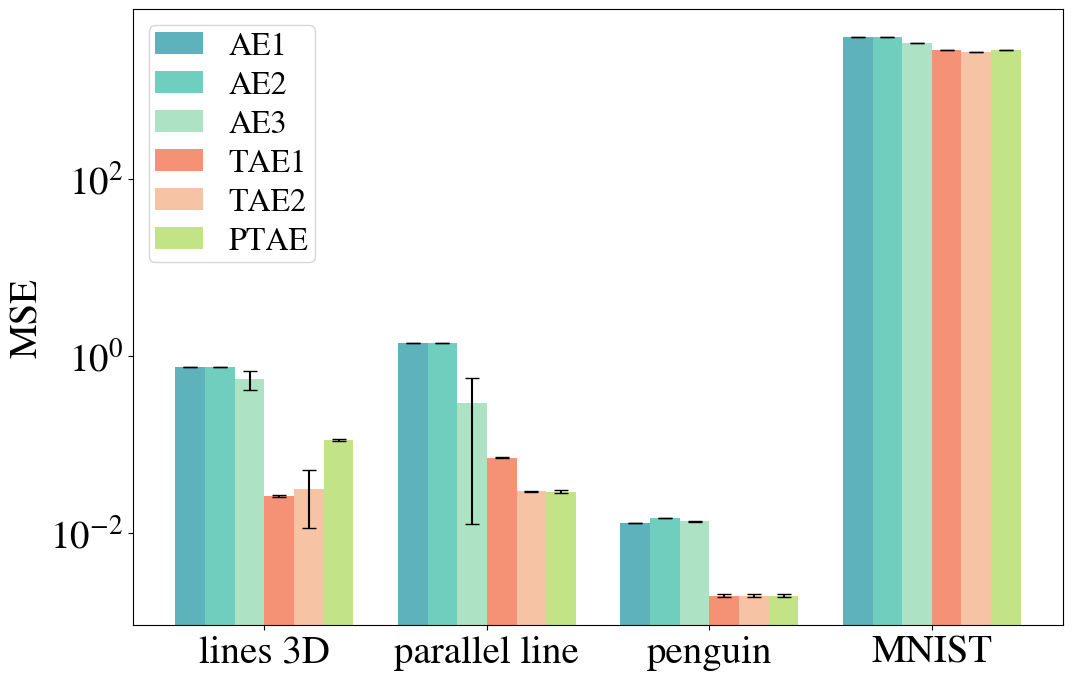

In [53]:
df = pd.concat([res_denoise_syn.loc[(res_cluster_syn['data']=="lines_3D")],
                res_denoise_syn.loc[(res_cluster_syn['data']=="parallel_line")],                
                res_denoise_real.loc[(res_cluster_real['data']=="penguin4")],
                res_denoise_real.loc[(res_cluster_real['data']=="mnist")],
                ], ignore_index=True)
df = replace(df, column="data", find_str=["mnist"], replace_str=["MNIST"])
df = replace(df, column="data", find_str=["penguin4"], replace_str=["penguin"])
df = replace(df, column="data", find_str=["lines_3D"], replace_str=["lines 3D"])
df = replace(df, column="data", find_str=["parallel_line"], replace_str=["parallel line"])
plot_ae_bar(df, y_col = "final_train_loss", mean=True, sem=True, ylabel="MSE", yscale_log=True, legend_loc="upper left",  save_file="ae_denoise_main_draft.pdf")

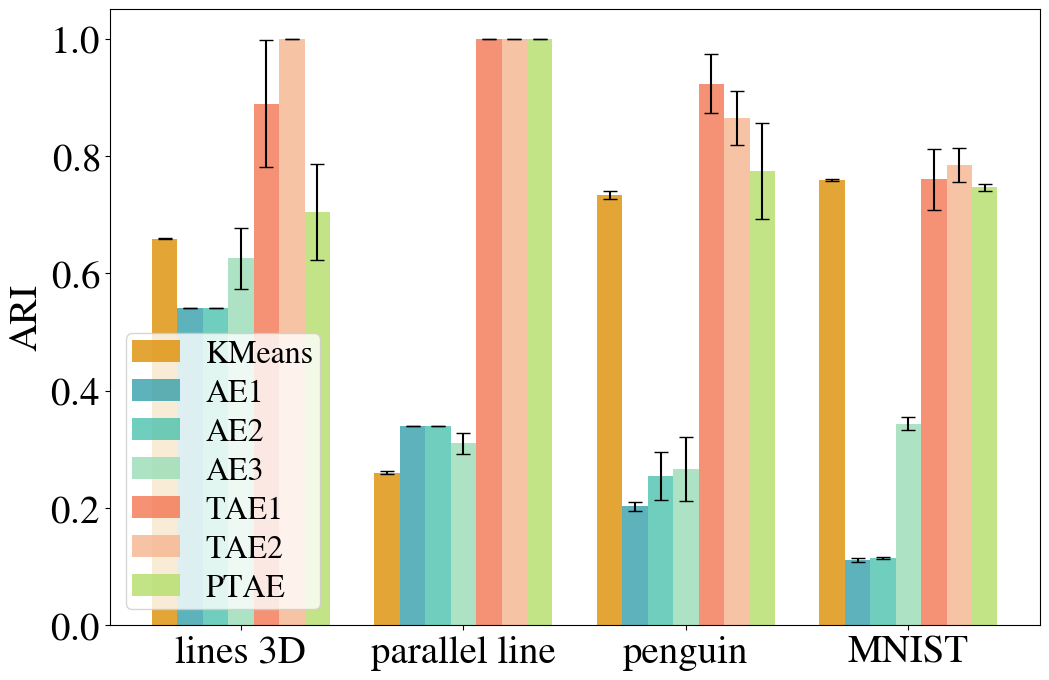

In [54]:
df = pd.concat([res_cluster_syn.loc[(res_cluster_syn['data']=="lines_3D")],
                res_cluster_syn.loc[(res_cluster_syn['data']=="parallel_line")],                
                res_cluster_real.loc[(res_cluster_real['data']=="penguin4")],
                res_cluster_real.loc[(res_cluster_real['data']=="mnist")],
                ], ignore_index=True)
df = replace(df, column="data", find_str=["lines_3D"], replace_str=["lines 3D"])
df = replace(df, column="data", find_str=["parallel_line"], replace_str=["parallel line"])
df = replace(df, column="data", find_str=["penguin4"], replace_str=["penguin"])
df = replace(df, column="data", find_str=["mnist"], replace_str=["MNIST"])
plot_ae_bar(df, y_col = "ari", mean=True, sem=True, ylabel="ARI", yscale_log=False, legend_loc="lower left", save_file="ae_clust_main_draft.pdf")

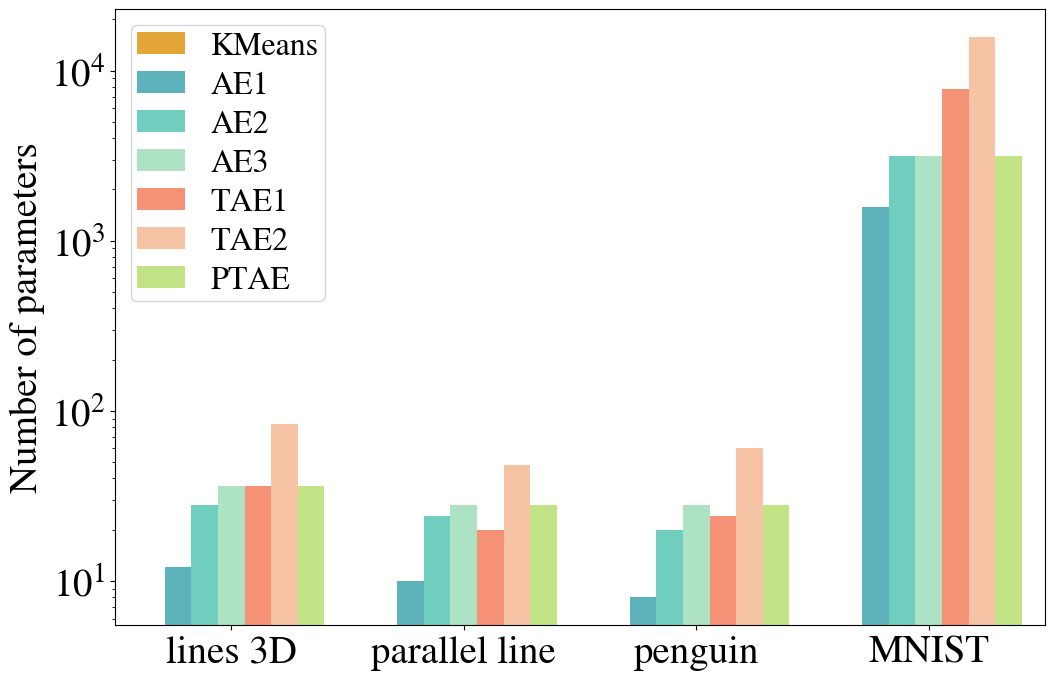

In [55]:
plot_ae_bar(df, y_col = "num_params", mean=False, sem=False, ylabel="Number of parameters", yscale_log=True, save_file="ae_num_param_main_draft.pdf")


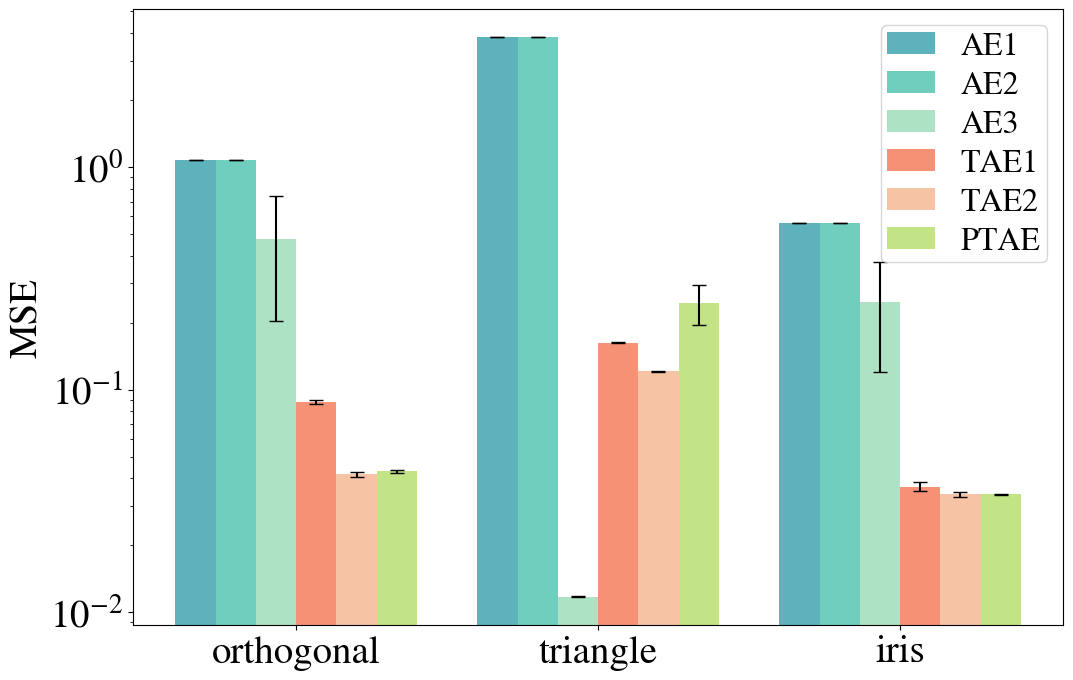

In [56]:
df = pd.concat([res_denoise_syn.loc[(res_cluster_syn['data']=="orthogonal")],
                res_denoise_syn.loc[(res_cluster_syn['data']=="triangle")],                
                res_denoise_real.loc[(res_cluster_real['data']=="iris")],
                ], ignore_index=True)
plot_ae_bar(df, y_col = "final_train_loss", mean=True, sem=True, ylabel="MSE", yscale_log=True, legend_loc="upper right",  save_file="ae_denoise_appendix.pdf")

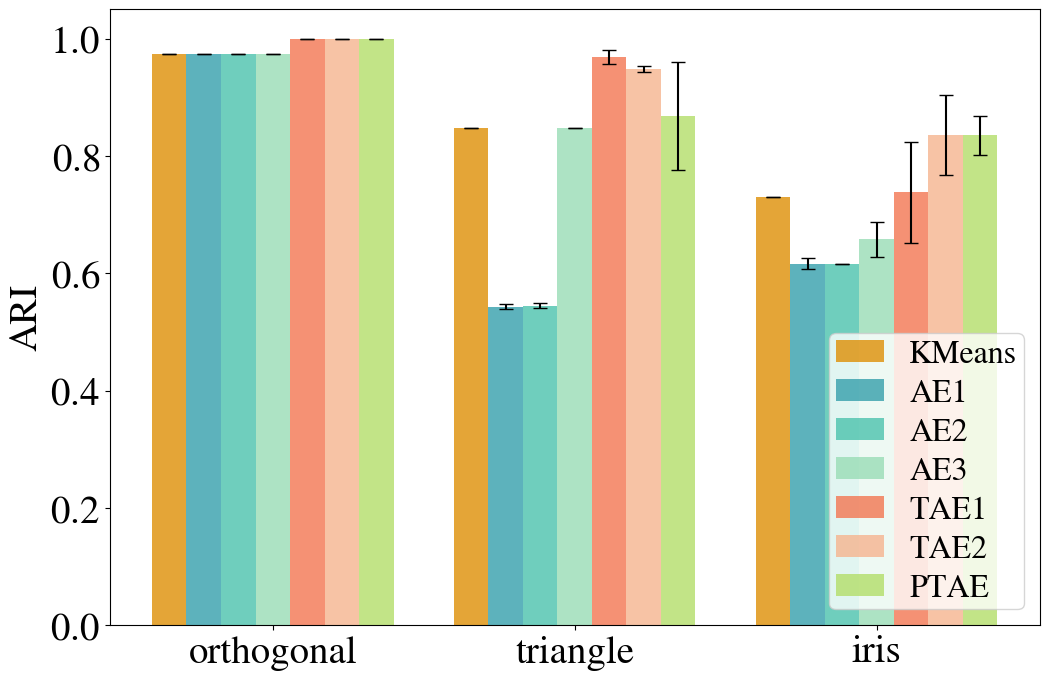

In [57]:
df = pd.concat([res_cluster_syn.loc[(res_cluster_syn['data']=="orthogonal")],
                res_cluster_syn.loc[(res_cluster_syn['data']=="triangle")],                
                res_cluster_real.loc[(res_cluster_real['data']=="iris")],
                ], ignore_index=True)
plot_ae_bar(df, y_col = "ari", mean=True, sem=True, ylabel="ARI", yscale_log=False, legend_loc="lower right", save_file="ae_clust_appendix.pdf")

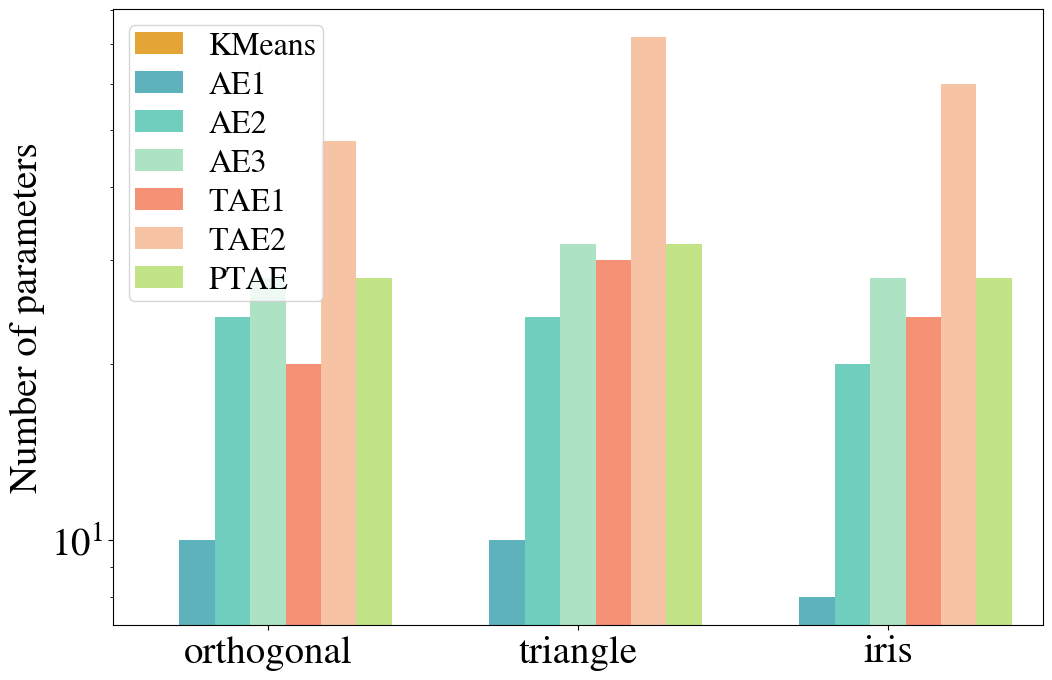

In [58]:
plot_ae_bar(df, y_col = "num_params", mean=False, sem=False, ylabel="Number of parameters", yscale_log=True, legend_loc="upper left", save_file="ae_num_param_appendix.pdf")


In [48]:
import csv
csv_file = 'results/ae_time_per_epoch.csv'
time_df = pd.read_csv(csv_file)
gtime_df = time_df.groupby(by=['data', 'model']).agg({
                                            'time': ['mean', 'sem'],
                                            }).reset_index()
gtime_df.columns = ['_'.join(col).strip() for col in gtime_df.columns.values]
time_df = gtime_df.rename(columns={"data_": "data", "model_": "model"})
time_df = replace(time_df, column="model", find_str=["ae1", "ae2", "ae3", "tae1", "tae2", "ptae"], replace_str=["AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"])
time_df['model'] = pd.Categorical(time_df.model, categories=["AE1", "AE2", "AE3", "TAE1", "TAE2", "PTAE"], ordered=True)
time_df = time_df.sort_values('model')


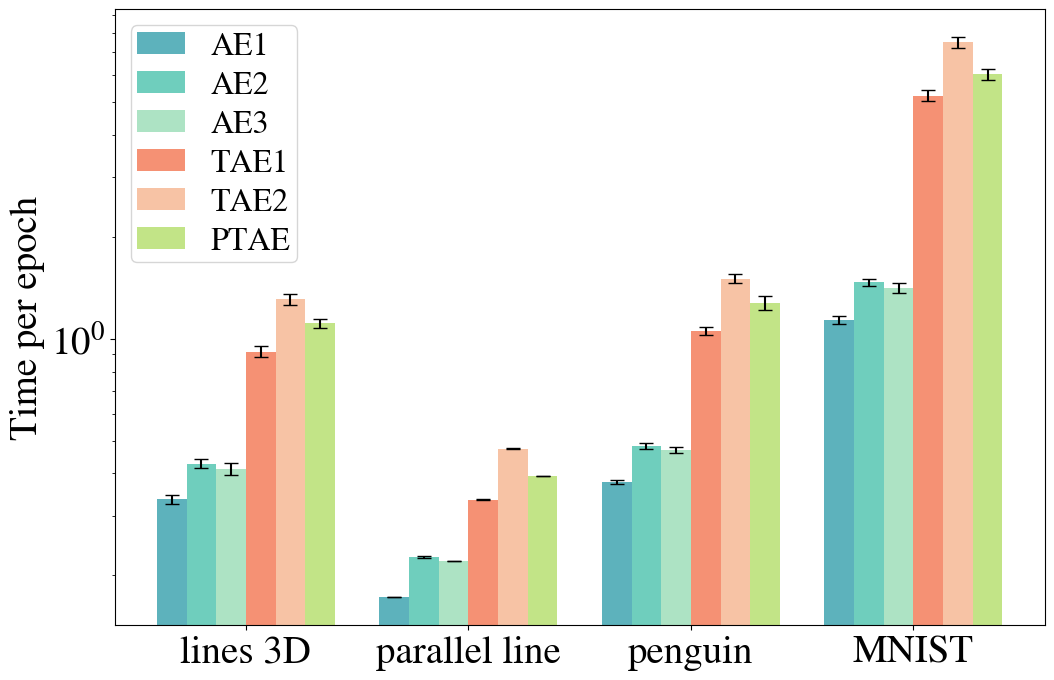

In [49]:
df = pd.concat([time_df.loc[(time_df['data']=="lines_3D")],
                time_df.loc[(time_df['data']=="parallel_line")],                
                time_df.loc[(time_df['data']=="penguin4")],
                time_df.loc[(time_df['data']=="mnist")],
                ], ignore_index=True)
df = replace(df, column="data", find_str=["mnist"], replace_str=["MNIST"])
df = replace(df, column="data", find_str=["penguin4"], replace_str=["penguin"])
df = replace(df, column="data", find_str=["lines_3D"], replace_str=["lines 3D"])
df = replace(df, column="data", find_str=["parallel_line"], replace_str=["parallel line"])
plot_ae_bar(df, y_col = "time", mean=True, sem=True, ylabel="Time per epoch", yscale_log=True, legend_loc="upper left",  save_file="ae_time_main_draft.pdf")


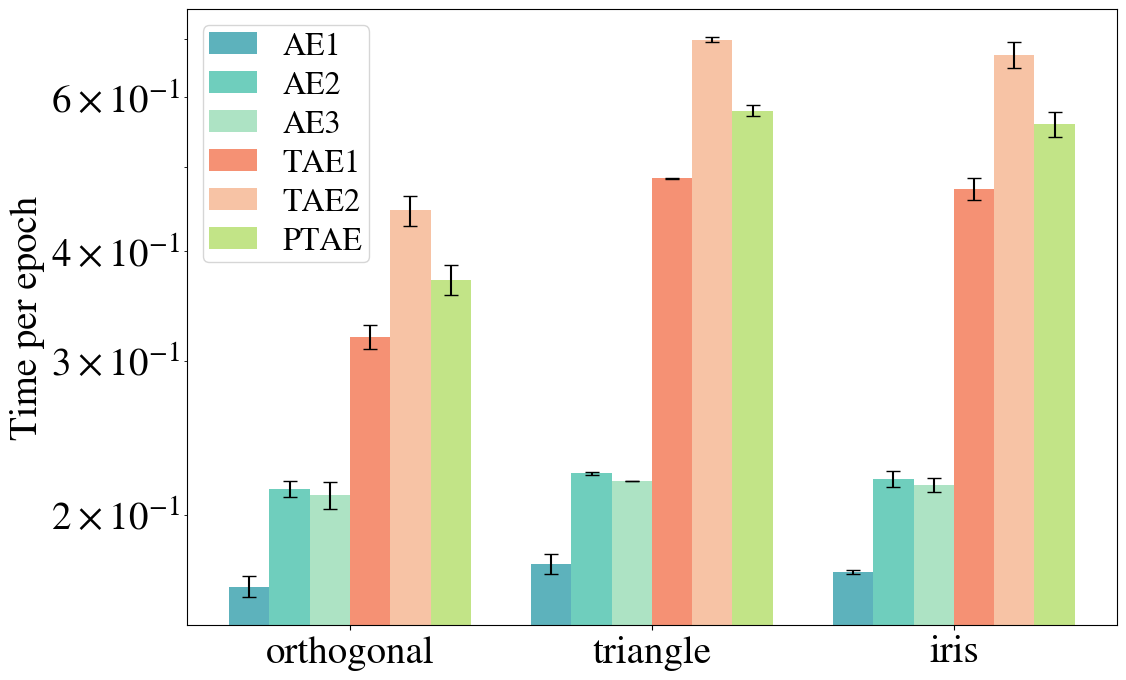

In [50]:
df = pd.concat([time_df.loc[(time_df['data']=="orthogonal")],
                time_df.loc[(time_df['data']=="triangle")],                
                time_df.loc[(time_df['data']=="iris")],
                ], ignore_index=True)
plot_ae_bar(df, y_col = "time", mean=True, sem=True, ylabel="Time per epoch", yscale_log=True, legend_loc="upper left",  save_file="ae_time_appendix.pdf")


## VAE

In [6]:
mpl.rcParams['font.size'] = 14

In [7]:
def plot_vae(lr = 1e-3, epochs = 200, reg = 0.2, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=32, clust_idx=None, device="cpu", save_file=None, latent_space=True, dataset='mnist', batch_size = 50, class_labels_list = [0,1,9], num_samples = 200, data_path = './data'):
    if save_file:
        save_file = f'{vae}_lr{lr}_ep{epochs}_reg{reg}_mse{mse}_lout{linear_output}_clustid{clust_idx}_latent{latent_space}_n{n_img}.pdf'
    model = load_vae_model(lr=lr, epochs=epochs, reg=reg, 
                mse=mse, linear_output=linear_output, n_clusters = n_clusters,
                vae=vae, cnn_vae=cnn_vae, digit_size=digit_size, device=device)
    if latent_space:
        plot_latent_space_vae(model, idx=clust_idx, scale=1.0, n=n_img, digit_size=digit_size, figsize=3, cnn_vae=cnn_vae, device=device, save_file=save_file)
    else:
        if cnn_vae:
            # create a transofrm to apply to each datapoint
            transform = transforms.Compose(
                [transforms.Pad(padding=2), transforms.ToTensor()]
            )
        else:
            transform = None
        train_loader, test_loader = image_data_loader(dataset=dataset, path = data_path, batch_size = batch_size, class_labels_list = class_labels_list, num_samples = num_samples, transform=transform)
        if save_file:
            save_file = f'{vae}_lr{lr}_ep{epochs}_reg{reg}_mse{mse}_lout{linear_output}_clustid{clust_idx}_latent{latent_space}_train.pdf'
        plot_vae_representation_per_cluster(model, loader=train_loader, cnn_vae=cnn_vae, batch_size=batch_size, clust_idx=clust_idx, figsize=6, device=device, save_file=save_file)
        if save_file:
            save_file = f'{vae}_lr{lr}_ep{epochs}_reg{reg}_mse{mse}_lout{linear_output}_clustid{clust_idx}_latent{latent_space}_test.pdf'
        plot_vae_representation_per_cluster(model, loader=test_loader, cnn_vae=cnn_vae, batch_size=batch_size, clust_idx=clust_idx, figsize=6, device=device, save_file=save_file)
        

### non tensor VAE

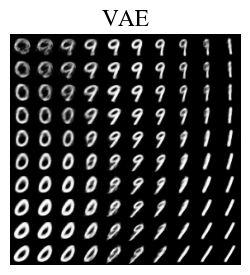

In [8]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.5, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


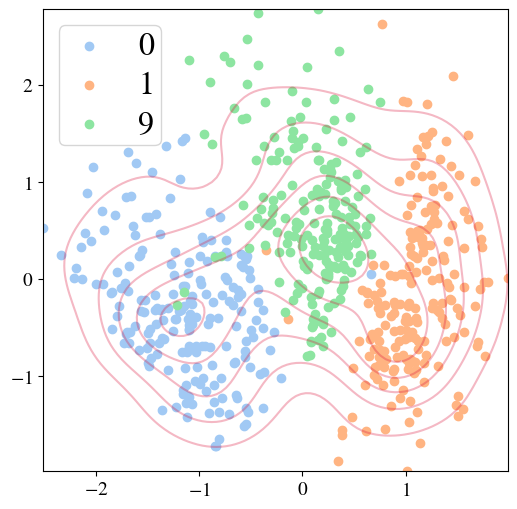

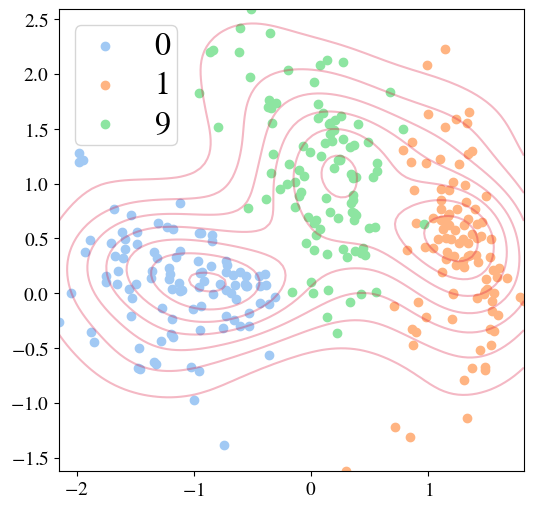

In [9]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.5, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1, latent_space=False)

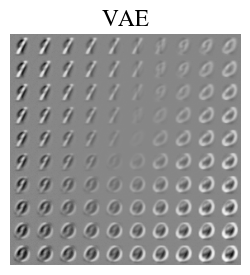

In [10]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.5, 
         mse = True, linear_output = True, n_clusters = None,
        n_img=10, vae="vae", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


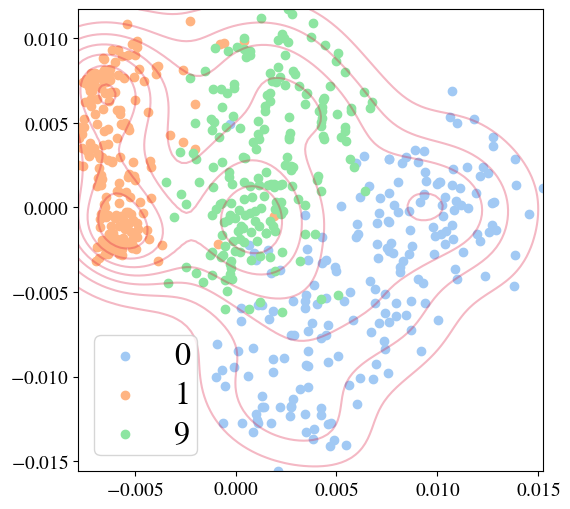

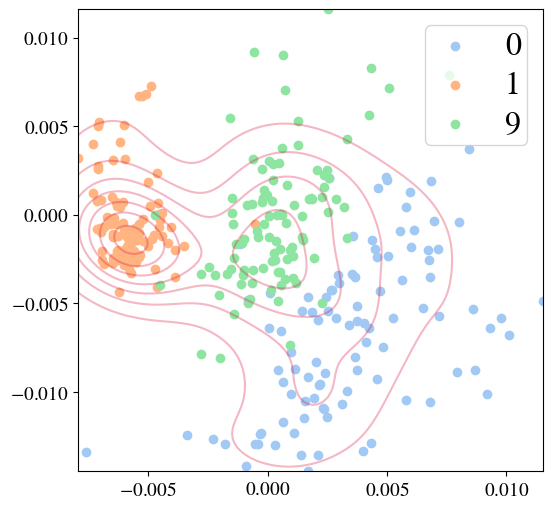

In [11]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.5, 
         mse = True, linear_output = True, n_clusters = None,
        n_img=10, vae="vae", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1, latent_space=False)

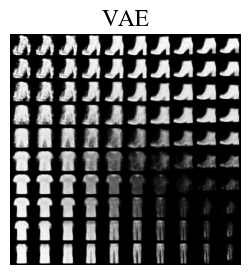

In [13]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.3, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae_cnn", cnn_vae=True, digit_size=32, clust_idx=None, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


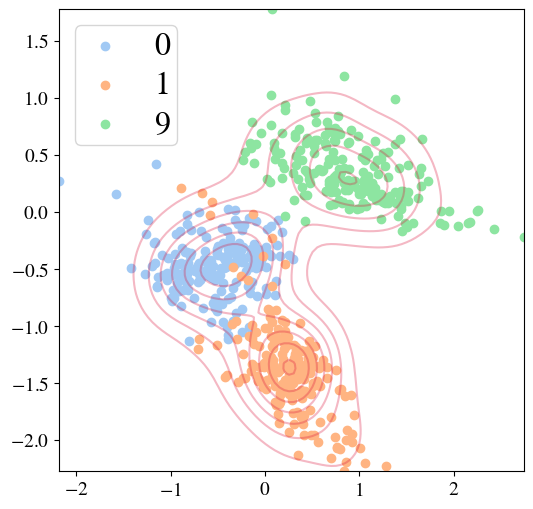

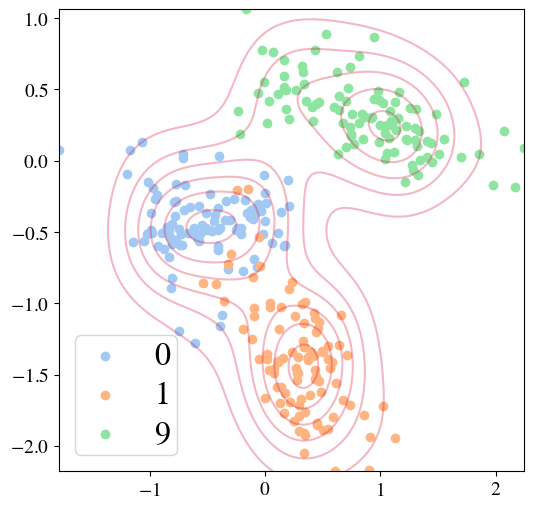

In [18]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.3, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae_cnn", cnn_vae=True, digit_size=32, clust_idx=None, device=device, save_file=1, latent_space=False, dataset="fmnist")

### tensorVAE

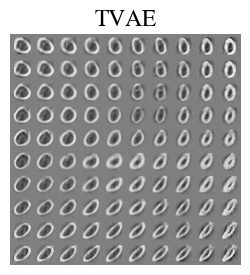

In [15]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


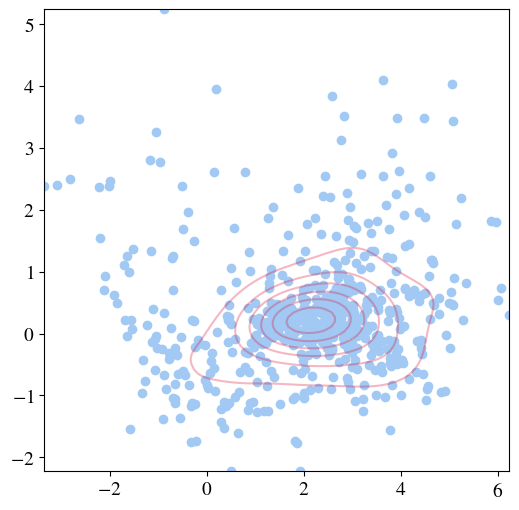

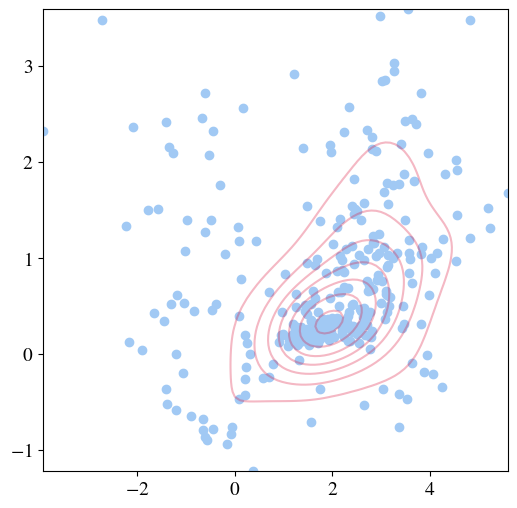

In [16]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1, latent_space=False)

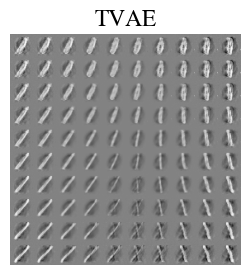

In [17]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


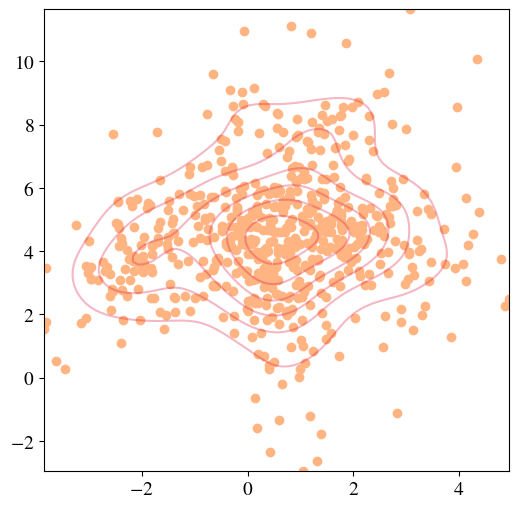

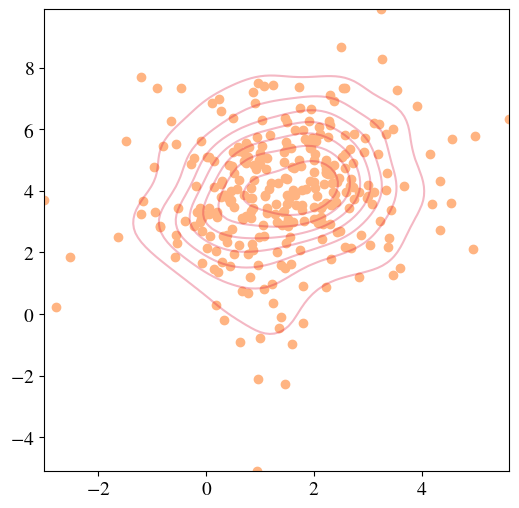

In [18]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1,latent_space=False)

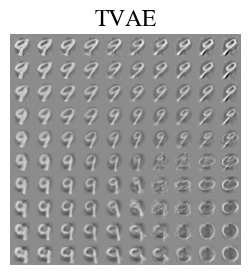

In [19]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=2, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


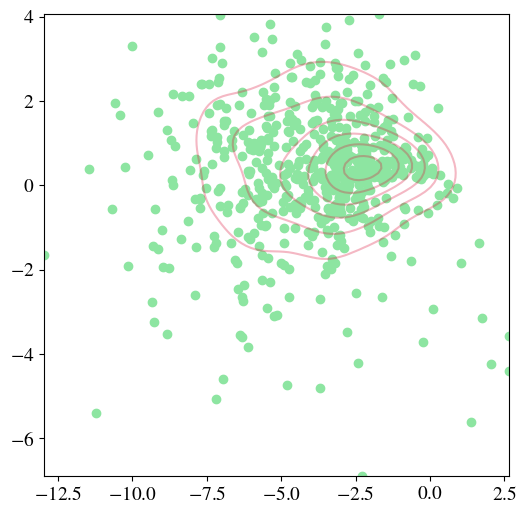

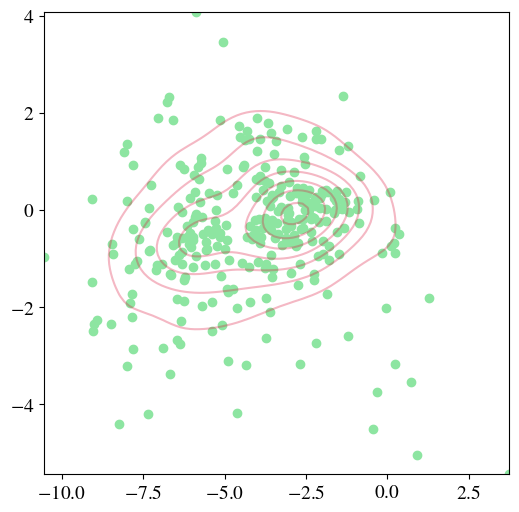

In [20]:
plot_vae(lr = 1e-3, epochs = 500, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=2, device=device, save_file=1, latent_space=False)

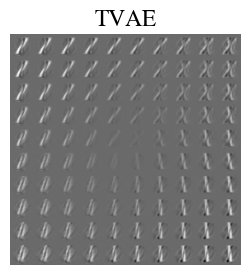

In [42]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


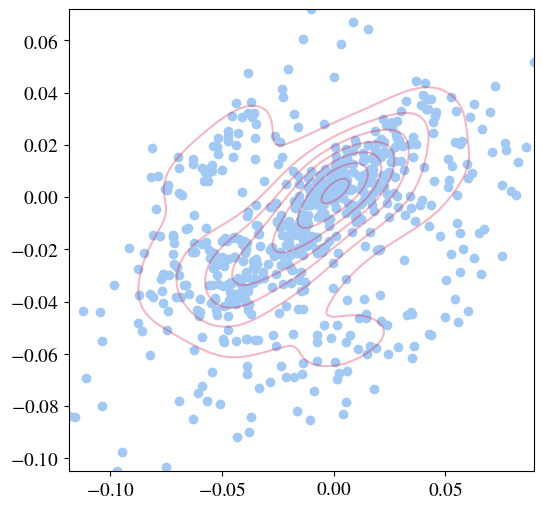

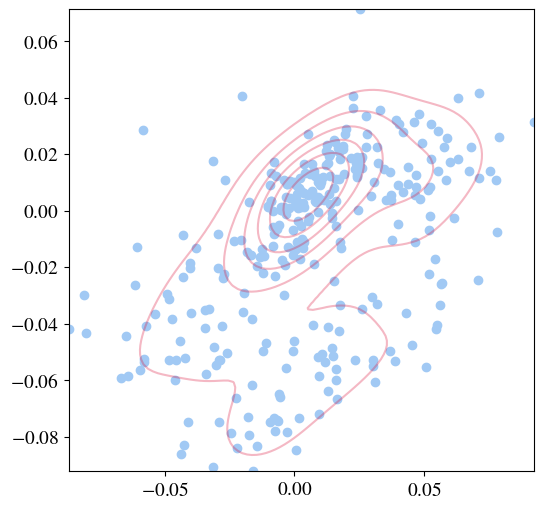

In [22]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1, latent_space=False)

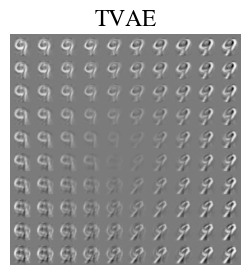

In [43]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


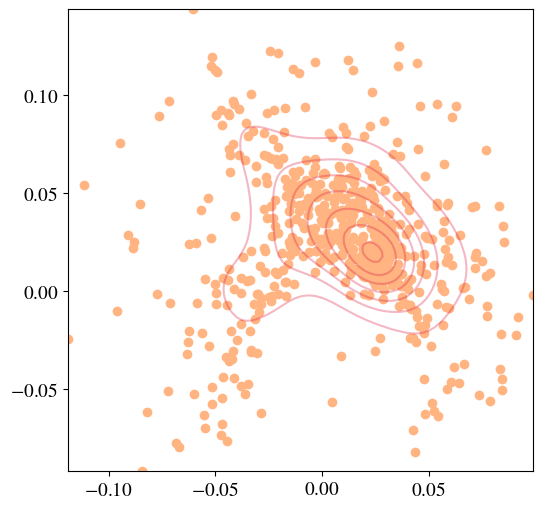

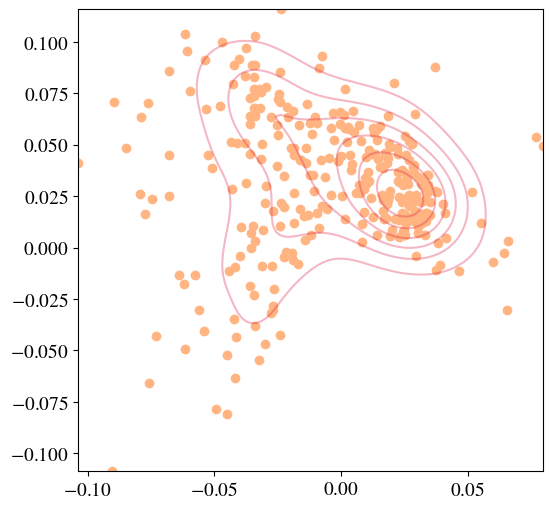

In [24]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1, latent_space=False)

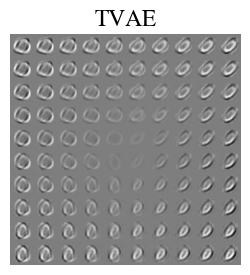

In [44]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=10, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=2, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


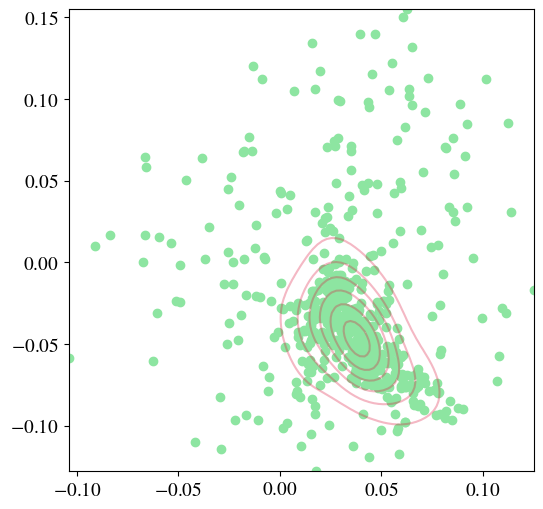

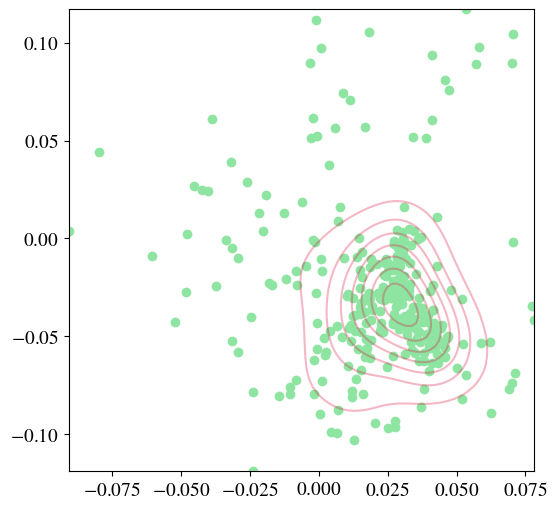

In [26]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = True, linear_output = True, n_clusters = 3,
        n_img=15, vae="tvae", cnn_vae=False, digit_size=28, clust_idx=2, device=device, save_file=1, latent_space=False)

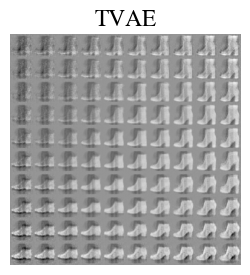

In [12]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=0, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


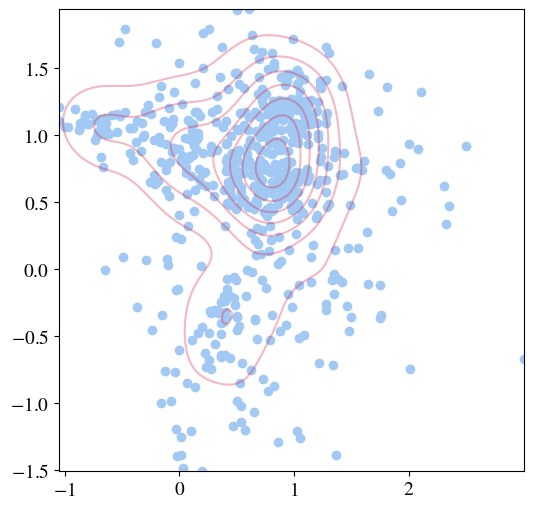

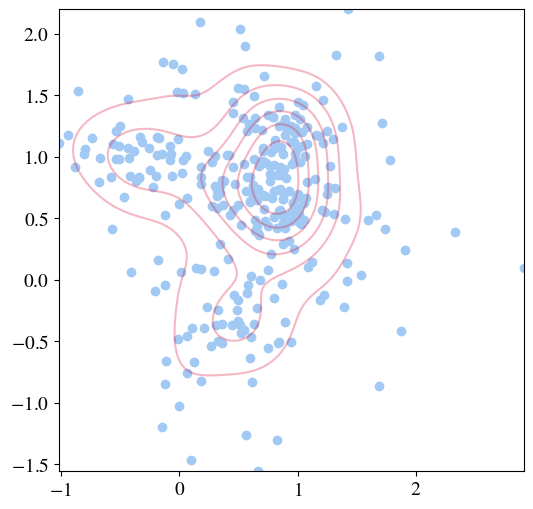

In [11]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=0, device=device, save_file=1, latent_space=False, dataset="fmnist")

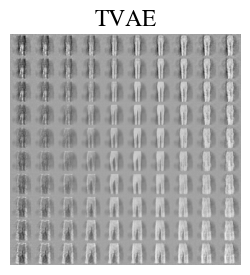

In [13]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=1, device=device, save_file=1)

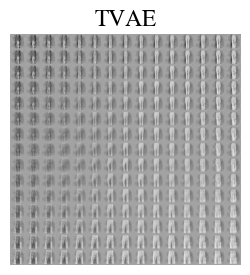

In [14]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=1, device=device, save_file=1, dataset="fmnist")

Number of total train and test samples  torch.Size([600]) torch.Size([300])


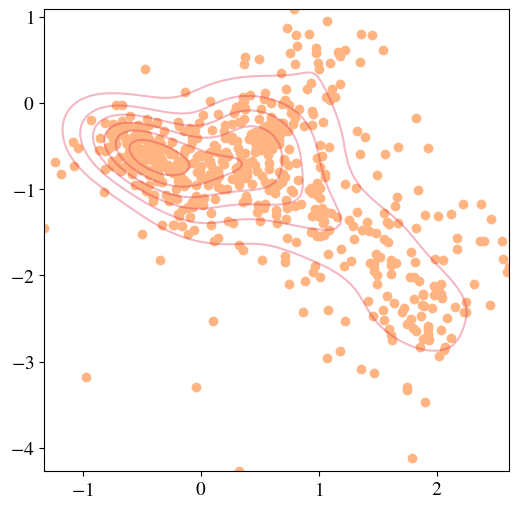

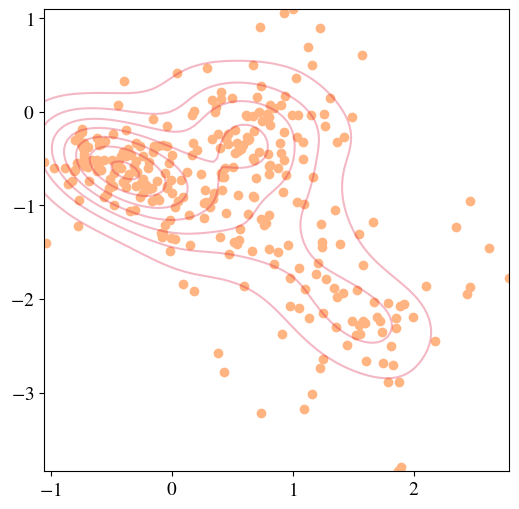

In [19]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=15, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=1, device=device, save_file=1, latent_space=False, dataset="fmnist")

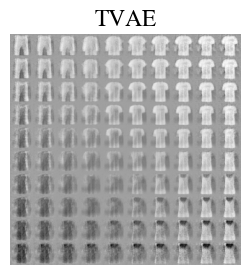

In [15]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=2, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


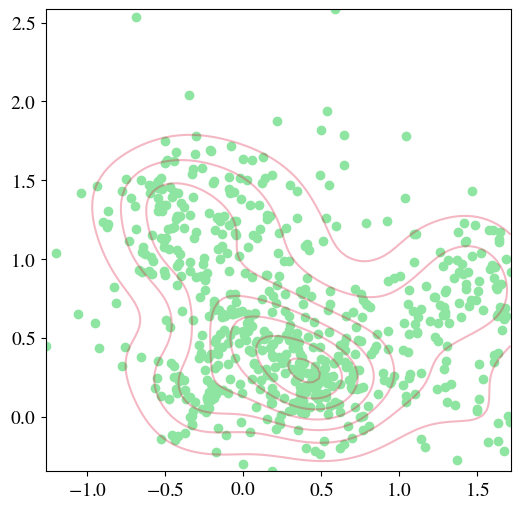

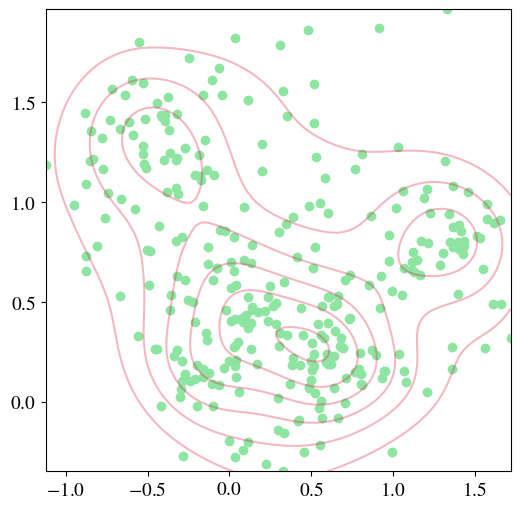

In [17]:
plot_vae(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        n_img=10, vae="tvae_cnn", cnn_vae=True, digit_size=32, clust_idx=2, device=device, save_file=1, latent_space=False, dataset="fmnist")

## less cluster than classes

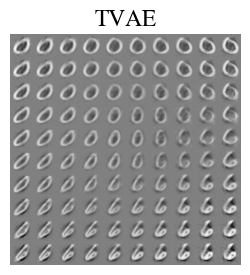

In [38]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 2,
        n_img=10, vae="tvae_lessclust", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


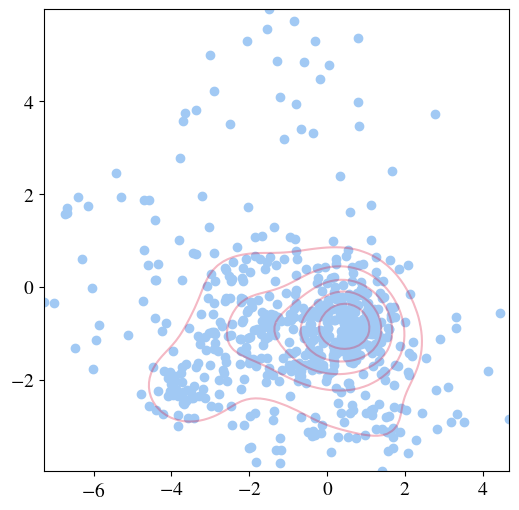

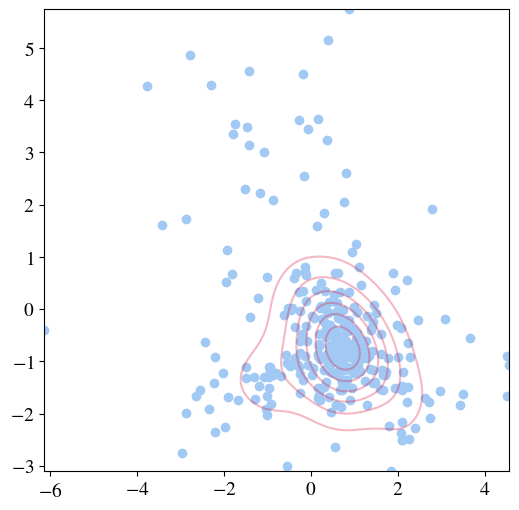

In [48]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 2,
        n_img=15, vae="tvae_lessclust", cnn_vae=False, digit_size=28, clust_idx=0, device=device, save_file=1, latent_space=False, class_labels_list = [0,1,3,6,7,9], num_samples = 100)

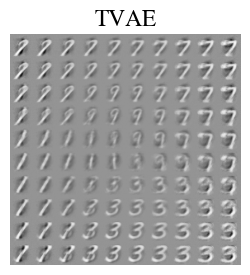

In [37]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 2,
        n_img=10, vae="tvae_lessclust", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


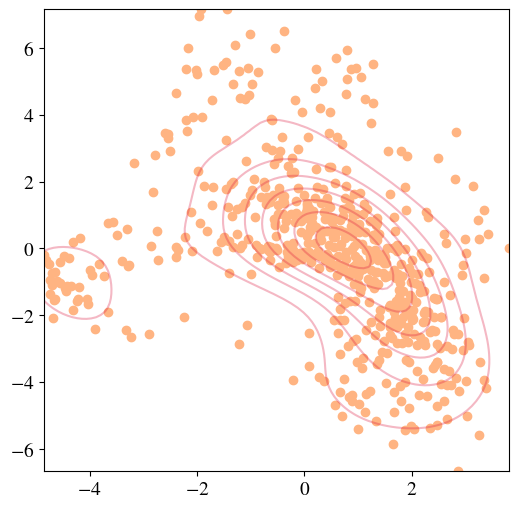

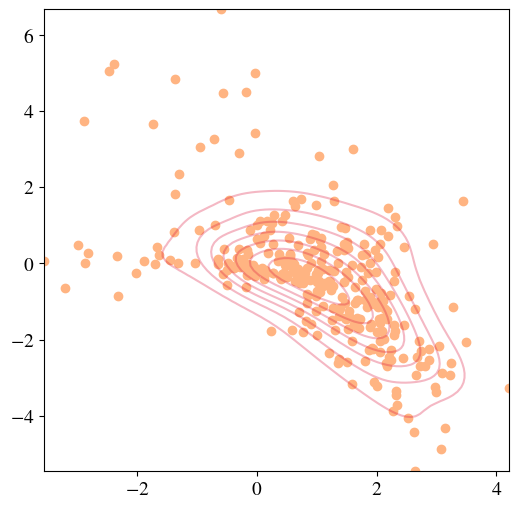

In [47]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 2,
        n_img=15, vae="tvae_lessclust", cnn_vae=False, digit_size=28, clust_idx=1, device=device, save_file=1, latent_space=False, class_labels_list = [0,1,3,6,7,9], num_samples = 100)

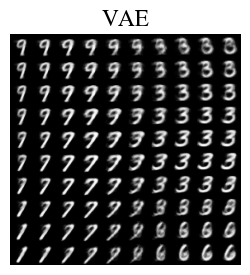

In [40]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.5, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae_lessclust", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


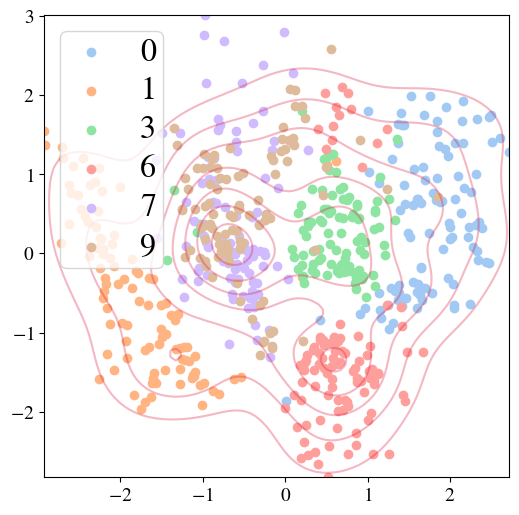

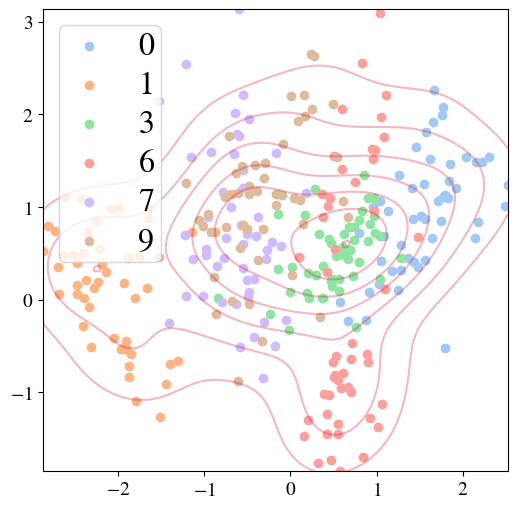

In [46]:
plot_vae(lr = 1e-3, epochs = 100, reg = 0.5, 
         mse = False, linear_output = False, n_clusters = None,
        n_img=10, vae="vae_lessclust", cnn_vae=False, digit_size=28, clust_idx=None, device=device, save_file=1, latent_space=False, class_labels_list = [0,1,3,6,7,9], num_samples = 100)